<a href="https://colab.research.google.com/github/andreacini/ml-19-20/blob/master/02_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning

Prof. Cesare Alippi  
Andrea Cini  ([`andrea.cini@usi.ch`](mailto:daniele.grattarola@usi.ch)  )    
Daniele Zambon ([`daniele.zambon@usi.ch`](mailto:daniele.zambon@usi.ch)  )

---
# Lab 02: Classification

We have a $d$-dimensional input vector $X \in \mathbb{R}^d$ and a set of $k$ possible classes, $C_1, \dots, C_k$.
Our goal in classification is to assign $X$ to the correct class. 

In particular, our goal is to determine a __discriminant__ function to parition the input space. In this session we will focus on binary classification.

![alt text](http://atriplex.info/blog/wp-content/uploads/2017/05/th_lda.png)

---
# Logistic Regression

Consider a binary classification problem $\{(x_1, y_1), \dots, (x_1, y_n)\}$ and a Logistic Regression model, then:

$$Pr(y_i=1\vert x_i, \boldsymbol \theta) = \sigma(x_i^\top\boldsymbol \theta) = \frac{1}{1+e^{-x_i^\top\boldsymbol \theta}}$$

Let's get some data and use _scikit-learn_ to fit a Logistic Regression model on them.

In [0]:
# first we define some helper functions to generate data and plot results
import numpy as np
from sklearn.datasets import make_classification, make_circles, make_moons
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# color_maps
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])  

# function to generate classification problems
def get_data(n, ctype='simple'):
  if ctype == 'simple':
    x, y = make_classification(n_features=2, 
                               n_redundant=0, 
                               n_informative=2, 
                               n_clusters_per_class=1)
    x += np.random.uniform(size=x.shape) # add some noise
  elif ctype == 'circles':
    x, y = make_circles(n, noise=0.1, factor=0.5)
  
  elif ctype == 'moons':
    x, y = make_moons(n, noise=0.1)
  else:
    raise ValueError
  return x, y

# function to plot decision boundaries
def plot_decision_surface(model, x, y, transform=lambda x:x):    
  #init figure
  fig = plt.figure()

  # Create mesh
  h = .01  # step size in the mesh
  x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
  y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

  # plot train data
  plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cm_bright,
              edgecolors='k')
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

  plt.xlabel(r'$x_1$')
  plt.ylabel(r'$x_2$');

  y_pred = model.predict(transform(np.c_[xx.ravel(), yy.ravel()]))

  y_pred = y_pred.reshape(xx.shape)
  plt.contourf(xx, yy, y_pred > 0.5, cmap=cm, alpha=.5)

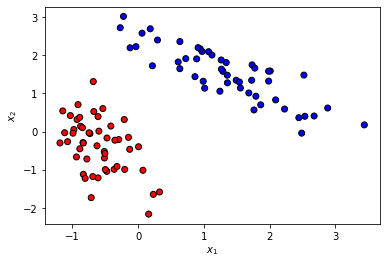

In [2]:
np.random.seed(78)

# Create a classification problem
x, y = get_data(100)
 
# Let's look at the data
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cm_bright, edgecolors='k')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$');

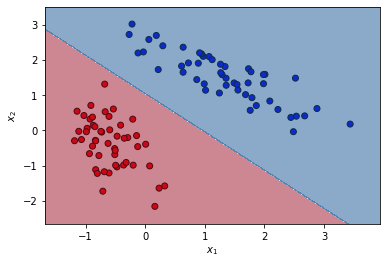

In [3]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(x, y)

plot_decision_surface(classifier, x, y)

Logistic Regression is often referred to as a **generalized linear method**. In fact, even if the model is nonlinear, the predicted class depends only on the linear combination $x_i^\top \boldsymbol \theta$ of the input variables. In other words, the decision surfaces are **linear**.

In fact, the decision boundary of the binary logistic regression model that we built can be written as:

$$x_2 = -\frac{\theta_0}{\theta_2} - \frac{\theta_1}{\theta_2} x_1$$

_Homework: show why this is true._

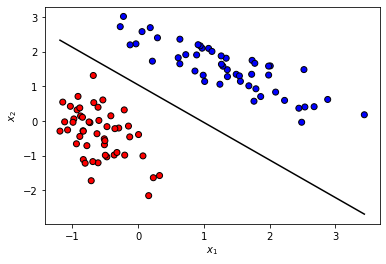

In [4]:
theta = np.c_[classifier.intercept_, classifier.coef_].ravel()
b = -theta[0]/theta[2]
m = -theta[1]/theta[2]

x1 = np.array([x[:,0].min(), x[:,0].max()])
x2 = b + m * x1

plt.plot(x1, x2, c='black')
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cm_bright, edgecolors='k')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$');

What happens if the data are not linerly separable?

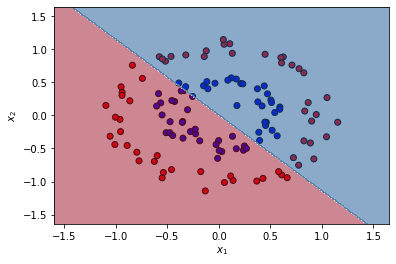

In [5]:
np.random.seed(20)

x,y = get_data(120, 'circles')

classifier = LogisticRegression()
classifier.fit(x, y)

plot_decision_surface(classifier, x, y)

Remember: the linearity is in the input variables! We can use some nonlinear features to project the data in a space where they are separable with a straight line.

Let's try with polar coordinates.

<img src="https://www.thedataschool.co.uk/wp-content/uploads/2017/01/x-y-coord-calc.jpg" width="300"/>



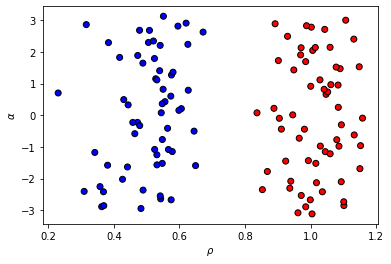

In [6]:
def to_polar(x):
  rho = np.sqrt(np.square(x).sum(axis=1))
  alpha = np.arctan2(x[:,1], x[:,0])
  return np.c_[rho, alpha]

x_polar = to_polar(x)

plt.scatter(x_polar[:, 0], x_polar[:, 1], c=y, cmap=cm_bright, edgecolors='k')
plt.xlabel(r'$\rho$')
plt.ylabel(r'$\alpha$');

Nice! Let's fit the model using the polar features.

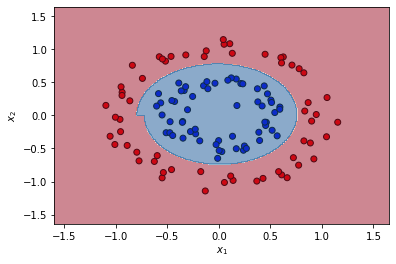

In [7]:
classifier = LogisticRegression()
classifier.fit(x_polar, y)

plot_decision_surface(classifier, x, y, transform=to_polar)

It is not always easy to find suitable features/projections by hand. That's why we need nonlinearity.

In the next part we will see how to use neural networks to solve classification problems.

## K-Nearest Neighbors

In [0]:
# try it on your own!